# Afiya

# fourier series

In [70]:
import numpy as np
import xarray as xr
import numpy as np
t = np.arange(1, 121,1)
print(t)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120]


In [13]:
x = (1.5*np.sin((2*np.pi*t)/12))+(0.8*np.cos((2*np.pi*t)/48))
print(x[:10])

[ 1.54315589  2.07177877  2.23910363  1.99185843  1.38468267  0.56568542
 -0.26299086 -0.89903811 -1.19385325 -1.09198287]


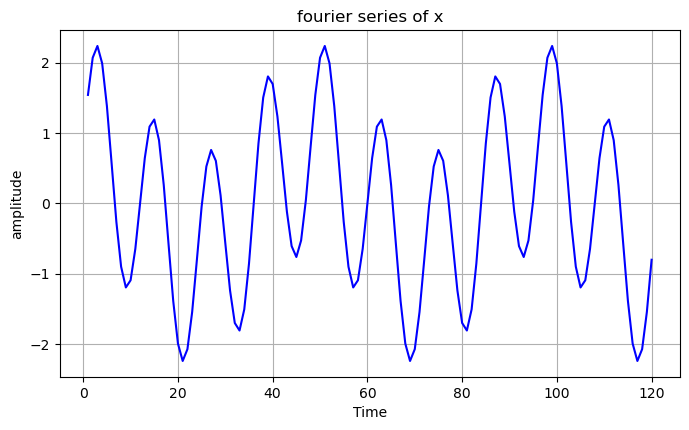

In [68]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (8,4.5))
plt.xlabel('Time')
plt.ylabel('amplitude')
plt.title('fourier series of x')
plt.plot(t, x, label = 'Time series plot', color = 'blue')
plt.grid(True)

# fourier transform

C:\Users\user\AppData\Local\Temp\ipykernel_13988\3387944761.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/xf,amplitude)


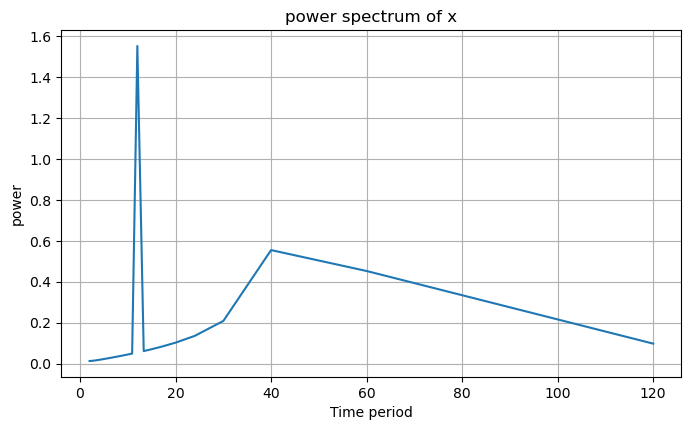

In [69]:
N = len(x)
dt = 1.0
yf = np.fft.rfft(x)
xf = np.fft.rfftfreq(N, d = dt)
amplitude = (2.0 / N)*np.abs(yf)
amplitude[0] = amplitude [0]/2
plt.figure(figsize = (8,4.5))
plt.plot(1/xf,amplitude)
plt.xlabel('Time period')
plt.ylabel('power')
plt.title('power spectrum of x')
plt.grid(True)
plt.show()




In [ ]:
# fourier transform n

In [61]:
import xarray as xr
import numpy as np
import pandas as pd
import glob
file_pattern = "F:\CDA-LAB\dataset\HadISST_sst.nc.gz"
file_paths = glob.glob(file_pattern)
ds = xr.open_mfdataset(file_paths)
print(ds)

<xarray.Dataset>
Dimensions:    (time: 1868, nv: 2, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2025-0...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 dask.array<chunksize=(1868, 2), meta=np.ndarray>
    sst        (time, latitude, longitude) float32 dask.array<chunksize=(1868, 180, 360), meta=np.ndarray>
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    6/10/

C:\Users\user\AppData\Local\Temp\ipykernel_13988\1592308684.py:10: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/xf,amplitude)


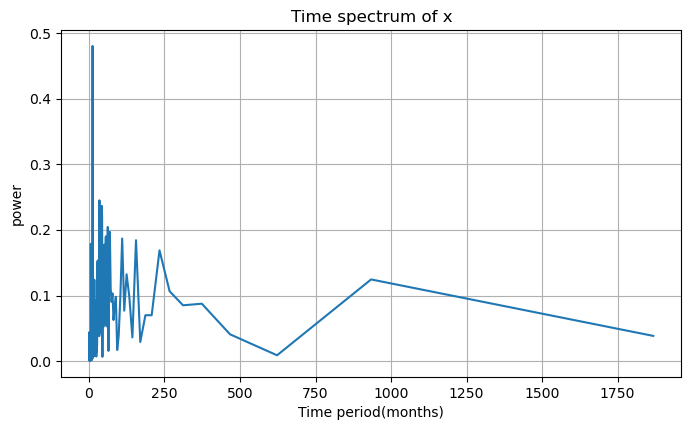

In [76]:
p = ds['sst']
regional_sst = p.sel(latitude = slice(5,-5),longitude = slice(-170,-120))
sst_nino34_mean = regional_sst.mean(dim = ['latitude','longitude'])
N1 = len(sst_nino34_mean)
yf = np.fft.rfft(sst_nino34_mean)
xf = np.fft.rfftfreq(N1, d = dt)
amplitude = (2.0 / N1)*np.abs(yf)
amplitude[0] = amplitude [0]/2
plt.figure(figsize = (8,4.5))
plt.plot(1/xf,amplitude)
plt.xlabel('Time period(months)')
plt.ylabel('power')
plt.title('Time spectrum of x')
plt.grid(True)
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\xarray\core\indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 156 times more chunks
  return self.array[key]


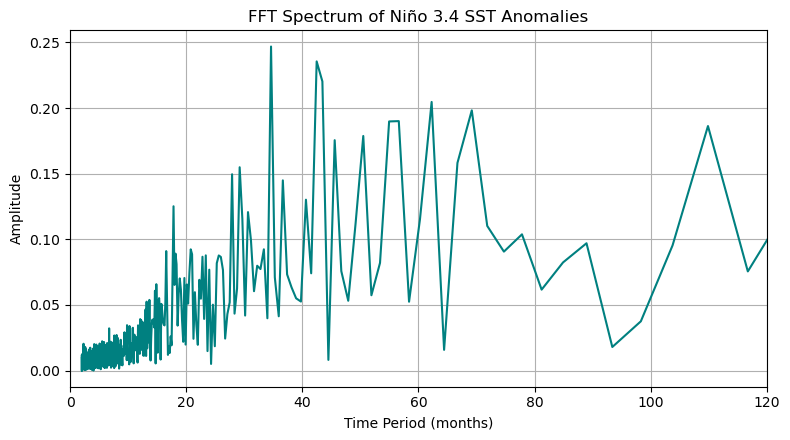

In [74]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Extract SST data
p = ds['sst']

# Select Niño 3.4 region: 5°N–5°S, 170°W–120°W
regional_sst = p.sel(latitude=slice(5, -5), longitude=slice(-170, -120))

# Compute area-averaged SST over the region
sst_nino34_mean = regional_sst.mean(dim=['latitude', 'longitude'])

# Compute monthly climatology
climatology = sst_nino34_mean.groupby('time.month').mean('time')

# Compute anomalies
anomalies = sst_nino34_mean.groupby('time.month') - climatology

# Convert anomalies to NumPy array
anomaly_array = anomalies.values

# FFT parameters
N = len(anomaly_array)                     # Number of data points
dt = 1                                     # Time step in months
yf = np.fft.rfft(anomaly_array)            # FFT of anomalies
xf = np.fft.rfftfreq(N, d=dt)              # Frequencies
amplitude = (2.0 / N) * np.abs(yf)         # Amplitude spectrum
amplitude[0] = amplitude[0] / 2            # Adjust DC component

# Plot FFT spectrum
plt.figure(figsize=(8, 4.5))
plt.plot(1 / xf[1:], amplitude[1:], color='teal')  # Skip zero frequency to avoid division by zero
plt.xlabel('Time Period (months)')
plt.ylabel('Amplitude')
plt.title('FFT Spectrum of Niño 3.4 SST Anomalies')
plt.grid(True)
plt.xlim(0, 120) 
plt.tight_layout()
plt.show()

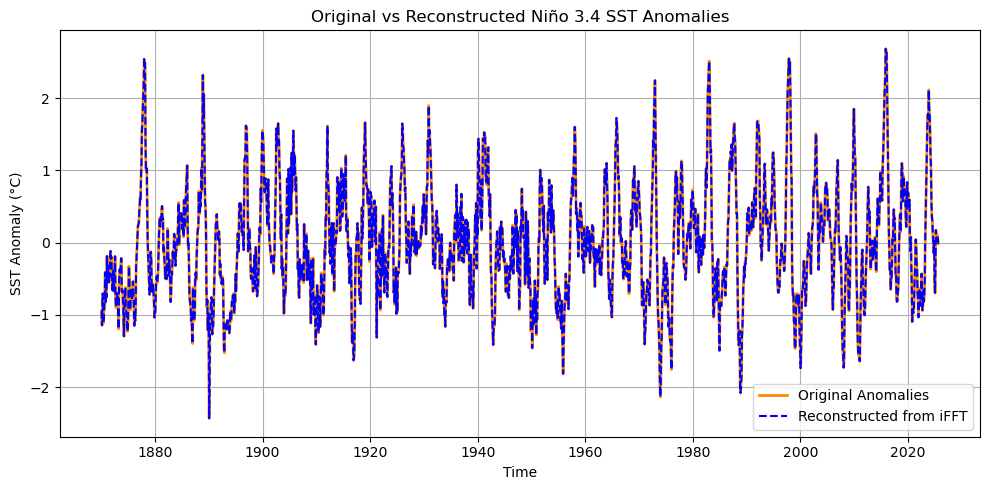

In [75]:
# Inverse FFT to reconstruct the anomaly signal
reconstructed_anomaly = np.fft.irfft(yf, n=N)

# Plot original vs reconstructed anomalies
plt.figure(figsize=(10, 5))
plt.plot(anomalies['time'], anomaly_array, label='Original Anomalies', color='darkorange', linewidth=2)
plt.plot(anomalies['time'], reconstructed_anomaly, label='Reconstructed from iFFT', color='blue', linestyle='--')
plt.xlabel('Time')
plt.ylabel('SST Anomaly (°C)')
plt.title('Original vs Reconstructed Niño 3.4 SST Anomalies')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()